## Observer model

In [1]:
import numpy as np
import scipy.linalg as la
import scipy.interpolate as interp
import scipy.integrate as integrate
import scipy
import matplotlib.pyplot as plt

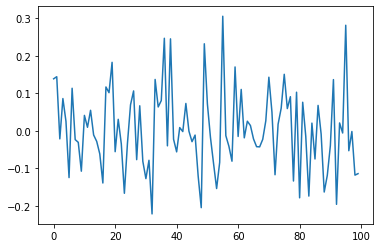

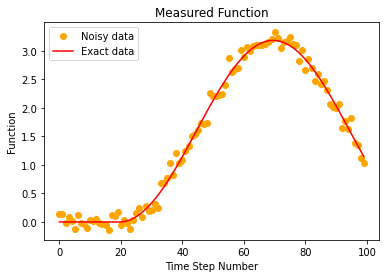

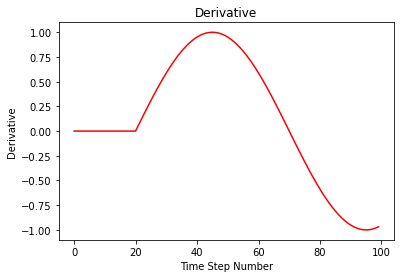

In [6]:
mode=0 

if mode==0: # generated data
    
    ntime = 100
    tau = 0.1
    
    xe = 0.
    
    Ve = np.zeros (ntime)
    Xmeasured = np.zeros (ntime)
    Xexact = np.zeros (ntime)
    TimeArray = np.zeros (ntime)
    
    for k in range (0,ntime):
        v = 1.0*np.sin(2.*np.pi*(k-20)/ntime)
        if (k<=20):
            v = 0.
            
        xe = xe + v*tau
        x = xe + 0.1 * np.random.normal()
        Xexact [k] = xe  # exact coordinate
        Xmeasured [k] = x 
        Ve [k] = v # exact derivative (velocity)
        
    plt.plot ((Xmeasured-Xexact))
    plt.figure ()
    
    plt.title ('Measured Function')
    plt.plot (Xmeasured, 'o', color = 'orange', label='Noisy data')
    plt.plot (Xexact, color = 'red', label='Exact data')
    plt.ylabel('Function')
    plt.xlabel('Time Step Number')
    plt.legend()
    plt.figure()
    plt.title ('Derivative')
    plt.plot (Ve, color = 'red', label = 'Exact ')
    #plt.legend()
    plt.ylabel('Derivative')
    plt.xlabel('Time Step Number')

## Real time observing

noisy data error 0.10477167050901103
filtered data error 0.031162039948128422
derivative error 0.13550524711878847


Text(0.5, 0, 'Time Step Number')

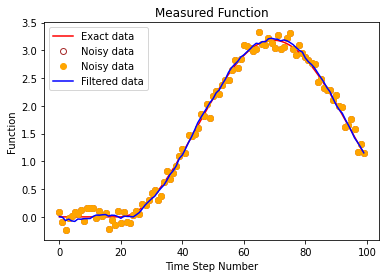

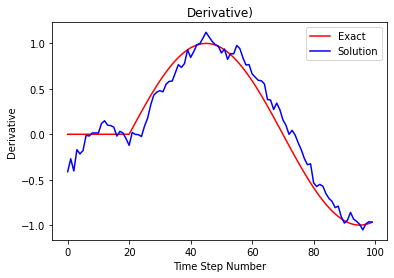

In [10]:
m = 5 # number of sensors

Xt = np.zeros (ntime)
Vt = np.zeros (ntime)

sigma_x = 0.05
sigma_v = sigma_x/tau

disp_mes = 0.1**2 
disp = 0.5 * disp_mes # 0.005 

x = 0.; v = 0. # initial conditions

xe = 0.

Z = np.zeros((2,1)) # vector of phase variables

Z[0] = x; Z[1] = v

P = np.zeros ((2,2)) # covariation matrix
P[0,0] = sigma_x**2
P[1,1] = sigma_v**2
P[0,1] = 0. #sigma_x*sigma_v
P[1,0] = 0. #sigma_x*sigma_v

Pini = P # initial matrix

Phi = np.eye (2)
Phi[0,1] = tau

G = np.zeros ((2,2))
G [1,1] = disp

H = np.zeros((m,2))

for l in range (0,m):
    H[l,0] = 1; H[l,1] = 0.

W = np.zeros((m,m))
K = np.zeros((2,m))

XmesArray = np.zeros((m,1))
DmesPredict = np.zeros((m,1))

R = np.eye(m)
for l in range (0,m):
    R[l,l] = disp_mes

E = np.eye(2)

for k in range (0,ntime):
    
    v = Ve [k]
    x = Xmeasured[k]
    xe = Xexact[k]
    
    Xmeasured[k] = Xexact[k] + 0.1 * np.random.normal() 
    
    for l in range (0,m):
        XmesArray[l,0] = Xexact[k]+0.1 * np.random.normal() # coordinate mesured with l-th sensor         
            
    if (k==0):
        Z[0] = Xmeasured[k] # the first step
        Z[1] = 0. #v
    
    
    # predictor stage
    
    Zp = Phi@Z
    Pp = Phi@P@Phi.T + Phi@G@Phi.T
    
    W = H@Pp@H.T
    K = Pp.T@H.T@np.linalg.inv(W+R)
    
    for l in range (0,m):
        DmesPredict[l,0] = XmesArray[l,0]-Zp[0]
    
    # corrector stage
    
    Z = Zp + K @ DmesPredict               
    P = (E-K@H)@Pp@(E-K@H).T+K@R@K.T
    
    Xt[k]=Z[0]
    Vt[k]=Z[1]
        

print ('noisy data error',(np.sum((Xmeasured-Xexact)**2)/len(Xt))**0.5)
print ('filtered data error',(np.sum((Xt-Xexact)**2)/len(Xt))**0.5)

print ('derivative error',(np.sum((Vt-Ve)**2)/len(Xt))**0.5)
        
plt.plot (Xexact, color = 'red', label = 'Exact data') 
plt.plot (Xmeasured, 'o', color = 'orange', markerfacecolor="None", markeredgecolor='brown', label='Noisy data')
plt.title ('Measured Function')
plt.plot (Xmeasured, 'o', color = 'orange', label='Noisy data')
plt.plot (Xt, color = 'blue', label = 'Filtered data')
plt.ylabel('Function')
plt.xlabel('Time Step Number')
plt.legend()
plt.figure()
plt.title ('Derivative)')
plt.plot (Ve, color = 'red', label = 'Exact ')
#plt.plot (Vt, 'o', color = 'blue', markerfacecolor="None", markeredgecolor='blue', label = 'Solution')
plt.plot (Vt, color = 'blue', label = 'Solution')
plt.legend()
plt.ylabel('Derivative')
plt.xlabel('Time Step Number')